![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the BSc-level course **Mechanical Properties of Loose Rocks and Soils**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics

# Triaxialversuch

In [217]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from ipywidgets import widgets
from ipywidgets import interact, interactive
from matplotlib import patches

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/Triaxial_plots.ipynb

Folgende Ergebnisse aus drei CU Versuchen seien gegeben.

* Konsolidierungsspannung: $\sigma_\text{c} = \left\{120, 234, 450 \right\}\,$kPa
* Backpressure: $u_0 = 0\,$kPa
* Porenwasserüberdruck im Bruchpunkt: $\Delta u = \left\{60, 104, 237 \right\}\,$kPa
* Axiale Spannungen im Bruchzustand: $\sigma_\text{1f} = \left\{293, 587, 975 \right\}\,$kPa

**Aufgaben:**

* Zeichnen Sie die Mohr'schen Spannungskreise im Bruchzustand und bestimmen Sie graphisch die effektiven Scherfestigkeitsparameter $c'$ und $\varphi'$.
* Bestimmen Sie graphisch die Normal- und Schubspannungen auf der Bruchfläche und sowie deren Orientierung unter Verwendung der Mohr'schen Spannungskreise ab.
* Zeichnen Sie die die totalen und effektiven Spannungspfade im $(\sigma_1-\sigma_3)/2$--$(\sigma_1+\sigma_3)/2$ bzw. $(\sigma_1'-\sigma_3')/2$--$(\sigma_1+\sigma_3)/2$ Diagramm (verwenden Sie ein und dasselbe Diagramm).
* Leiten Sie auch aus der letzten Darstellung die effektiven Scherfestigkeitsparameter graphisch ab.


## Lösung:

Wir bestimmen zunächst die effektiven Hauptspannungen im Bruchzustand:

\begin{align}
    \sigma_{1f}' &= \sigma_{1f} - (u_0 + \Delta u)
    \\
    \sigma_{3f}' &= \sigma_{3f} - (u_0 + \Delta u)
\end{align}

In [218]:
#gegebene Größen
s_1f = np.array([293,587,975])
s_3f = np.array([120,234,450])
u_0 = np.array([0,0,0])
u_f = u_0 + np.array([60,104,237])

In [219]:
s_1fe = s_1f - u_f
s_3fe = s_3f - u_f
print('Größte effektive Hauptspannungen beim Bruch in kPa: ', s_1fe)
print('Kleinste effektive Hauptspannungen beim Bruch in kPa: ', s_3fe)

Größte effektive Hauptspannungen beim Bruch in kPa:  [233 483 738]
Kleinste effektive Hauptspannungen beim Bruch in kPa:  [ 60 130 213]


Damit lassen sich die drei Bruchkreise zeichnen.

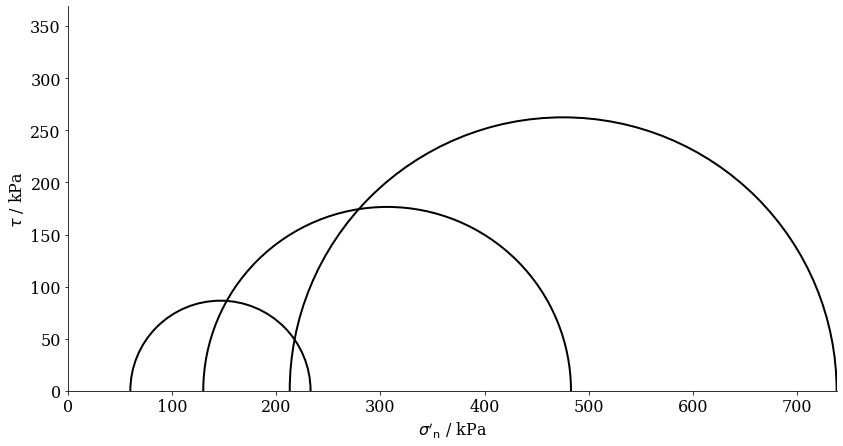

In [220]:
plot_basic_circles(s_1fe,s_3fe)

Wir zeichnen nun eine Gerade, die möglichst gut eine Tangente an die drei Bruchkreise darstellt (eigentlich suchen wir die Einhüllende, die in der Regel gekrümmt ist. Da wir aber für die Mohr-Coulomb'sche Bruchbedingung eine Linearisierung vornehmen, ist die Einhüllende als Gerade festgelegt).

Die Coulomb'sche Bruchbedingung (Gleichung der Grenzgeraden) ist:

$$
    \tau_\text{f} = c + \sigma_\text{n}' \tan \varphi'
$$

Um den Zusammenhang zu den Bruchhauptspannungen herzustellen schreiben wir die Mohr-Coulomb'sche Bruchbedingung in der Form:

$$
    \sigma_\text{1f}' = \frac{1+\sin\varphi'}{1-\sin\varphi'} \sigma_\text{3f}' + c' \frac{\cos \varphi'}{1-\sin\varphi'}
$$

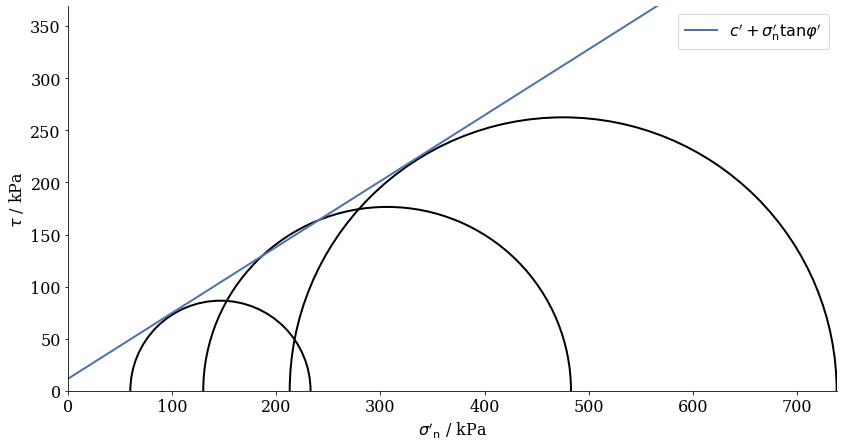

In [221]:
plot_circles_tangent(s_1fe,s_3fe)

Wir sehen, dass die Gerade nur eine Näherung darstellt. Dementsprechend gibt es zeichnerisch einen gewissen Spielraum, der sich in einer Streuung der Ergebnisse von $c'$ und $\varphi'$ niederschlägt. Mathematisch lässt sich mittels des Fehlerquadratminimums eine optimale Ausgleichsgerade finden.

In [222]:
sinphi, c = find_c_sinphi(s_1fe,s_3fe)
print("Die (effektive) Kohäsion beträgt %.1f kPa" %c)
print("Der (effektive) Reibungswinkel beträgt %.1f °" %np.rad2deg(np.arcsin(sinphi)))

Die (effektive) Kohäsion beträgt 11.4 kPa
Der (effektive) Reibungswinkel beträgt 32.3 °


Da die Wirkungsebene von $\sigma_1$ ein horizontaler Schnitt ist, liegt der Pol aller Spannungskreise in $\sigma_3$. Zeichnen wir durch diesen Pol eine Gerade zum Bruchpunkt, so können wir einerseits die in der unter $\vartheta$ zur Horizontalen geneigten Spannungen in der Bruchfläche ablesen, andererseits auch den Winkel $\vartheta$ ablesen, der sich zu

$$
    \vartheta = \frac{\pi}{4} + \frac{\varphi}{2}
$$

ergibt.

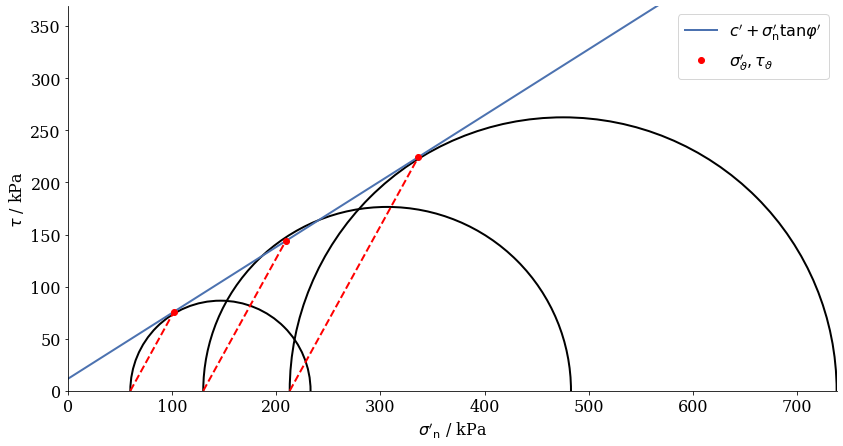

In [223]:
plot_circles_failure(s_1fe,s_3fe)

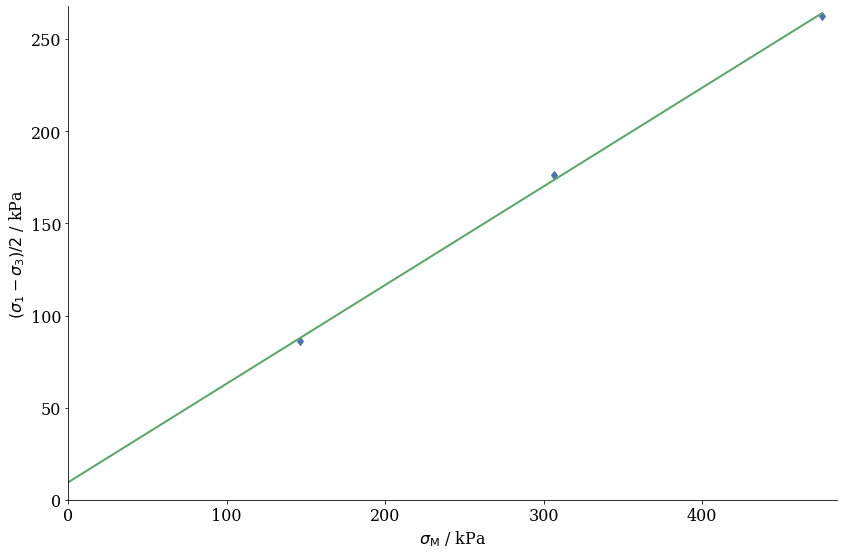

In [224]:
plot_pq(s_1fe,s_3fe)